In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Add dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os


In [2]:
cityDataToLoad = os.path.join("Resources", "city_data.csv")
rideDataToLoad = os.path.join("Resources", "ride_data.csv")

In [3]:
# Read the city data file and store it in a pandas DataFrame.
cityDataDF = pd.read_csv(cityDataToLoad)
cityDataDF.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
rideDataDF = pd.read_csv(rideDataToLoad)
rideDataDF.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# RIDE DATA
# Get total number of rows and columns 
print(cityDataDF.count())
# Get the columns and the rows that are not null.
print(cityDataDF.isnull().sum())

city            120
driver_count    120
type            120
dtype: int64
city            0
driver_count    0
type            0
dtype: int64


In [6]:
# Get the data types of each column
cityDataDF.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type of city.
cityDataDF["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the each city type.
print(sum(cityDataDF["type"] == "Urban"))
print(sum(cityDataDF["type"] == "Suburban"))
print(sum(cityDataDF["type"] == "Rural"))

66
36
18


In [9]:
# RIDE DATA:

# Get total number of rows and columns 
print(rideDataDF.count())
# Get the columns and the rows that are not null.
print(rideDataDF.isnull().sum())


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64


In [10]:
# Get the data types of each column.
rideDataDF.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [11]:
# Combine the data into a single dataset
pyberDataDF = pd.merge(rideDataDF, cityDataDF, on=["city","city"], how="left")
# Display the dataframe
pyberDataDF.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# *******************************************************
#                  Challenge 
# *******************************************************

# Technical Analysis 1 - Summary DataFrame
# -----------------------------------------

# Calculate Total Rides per city type
totalRides = pyberDataDF.groupby(["type"]).count()["ride_id"]

# Calculate Total Drivers per city type
totalDrivers = cityDataDF.groupby(["type"]).sum()["driver_count"]

# Calculate Total Fare and Average per Ride and Driver per city type
totalFare = pyberDataDF.groupby(["type"]).sum()["fare"]
avgFarePerRide = totalFare/totalRides
avgFarePerDriver = totalFare / totalDrivers


In [13]:
# Assemble into DataFrame
summaryDF = pd.DataFrame(
    {"Total Rides":totalRides,
      "Total Drivers":totalDrivers,
      "Total Fares":totalFare,
      "Average Fare per Ride":avgFarePerRide,
      "Average Fare per Driver":avgFarePerDriver})

      
# Sort the Summay DataFrame by correct column order.
columnOrder = ["Total Rides", "Total Drivers", "Total Fares", "Average Fare per Ride", "Average Fare per Driver"]
summaryDF = summaryDF[columnOrder]

# Format Total Rides and Total Drivers to have thousand separator
summaryDF["Total Rides"] = summaryDF["Total Rides"].map("{:,}".format)
summaryDF["Total Drivers"] = summaryDF["Total Drivers"].map("{:,}".format)

# Format Total Fares and Average Fares to have $, thousand separator and 2 decimals
summaryDF["Total Fares"] = summaryDF["Total Fares"].map("${:,.2f}".format)
summaryDF["Average Fare per Ride"] = summaryDF["Average Fare per Ride"].map("${:,.2f}".format)
summaryDF["Average Fare per Driver"] = summaryDF["Average Fare per Driver"].map("${:,.2f}".format)

# Remove the index name
summaryDF.index.name = None

# Display the Summary DataFrame 

summaryDF

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [14]:
# Technical Analysis 2 - Multiple-Line Plot for the Sum of the Fares for Each City Type
# ----------------------------------------------------------------------------------------

# Rename columns in pyberDataDF
pyberDataDF = pyberDataDF.rename(columns={"city":"City", "date":"Date","fare":"Fare", "ride_id":"Ride Id", "driver_count":"No. Drivers", "type":"City Type"})


In [15]:
# Set index to Date
pyberDataDF = pyberDataDF.set_index(["Date"])

# Convert index to Datetime data type
pyberDataDF.index = pd.to_datetime(pyberDataDF.index)

# Display pyberData DataFrame
pyberDataDF.head()


,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [16]:
# Create a copy of 'City Type' and 'Fare' columns from pyberData
pyberCityFaresDF = pyberDataDF.loc[:,["City Type","Fare"]].copy()
pyberCityFaresDF.head()


,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [17]:
# Check the index of pyberFaresDF is a Datetime data type inherited from the original copied
pyberCityFaresDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [18]:
# Calculate the sum of fares by the type of city and date
faresSumDF = pyberCityFaresDF.groupby(["City Type"]).sum()["Fare"]
faresSumDF

City Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Fare, dtype: float64

In [19]:
# Reset index of pyberFare DataFrame
pyberCityFaresDF = pyberCityFaresDF.reset_index()
pyberCityFaresDF.head(3)

,Date,City Type,Fare
0,2019-01-14 10:14:22,Urban,13.83
1,2019-03-04 18:24:09,Urban,30.24
2,2019-02-24 04:29:00,Urban,33.44


In [20]:
# Create a pivot table from pyberFaresDF to contain the sum of Fares by Date and by Type of City
import numpy as np

pivotTable = pd.pivot_table(pyberCityFaresDF, values="Fare", index=["Date"],
                    columns="City Type", aggfunc=np.sum)
pivotTable.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [21]:
# Filter data to select dates between 2019-01-01 and 2019-04-28
filteredDataDF = pivotTable.loc['2019-01-01':'2019-04-28']
print(filteredDataDF.head())
print(filteredDataDF.tail())

City Type            Rural  Suburban  Urban
Date                                       
2019-01-01 00:08:16    NaN       NaN  37.91
2019-01-01 00:46:46    NaN     47.74    NaN
2019-01-01 02:07:24    NaN     24.07    NaN
2019-01-01 03:46:50    NaN       NaN   7.57
2019-01-01 05:23:21    NaN       NaN  10.75
City Type            Rural  Suburban  Urban
Date                                       
2019-04-28 14:28:36    NaN       NaN  11.46
2019-04-28 16:29:16    NaN       NaN  36.42
2019-04-28 17:26:52    NaN       NaN  31.43
2019-04-28 17:38:09    NaN     34.87    NaN
2019-04-28 19:35:03    NaN     16.96    NaN


In [22]:
# Aggregate data to be binned by weeks
binnedDataDF = filteredDataDF.resample('W').sum()
binnedDataDF.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [23]:
# Function to get the date of the first ocurrence of a month
def firstDateEachMonth(listOfDates: list) -> list:

    firstsOfDates = []
    # Sort the list to have all the dates in order
    listOfDates.sort()
    iterator = 0

    for i in listOfDates:
        if iterator == 0:
            firstsOfDates.append(i)
        elif i.month != listOfDates[iterator-1].month:
            firstsOfDates.append(i) 
        iterator+=1

    return firstsOfDates

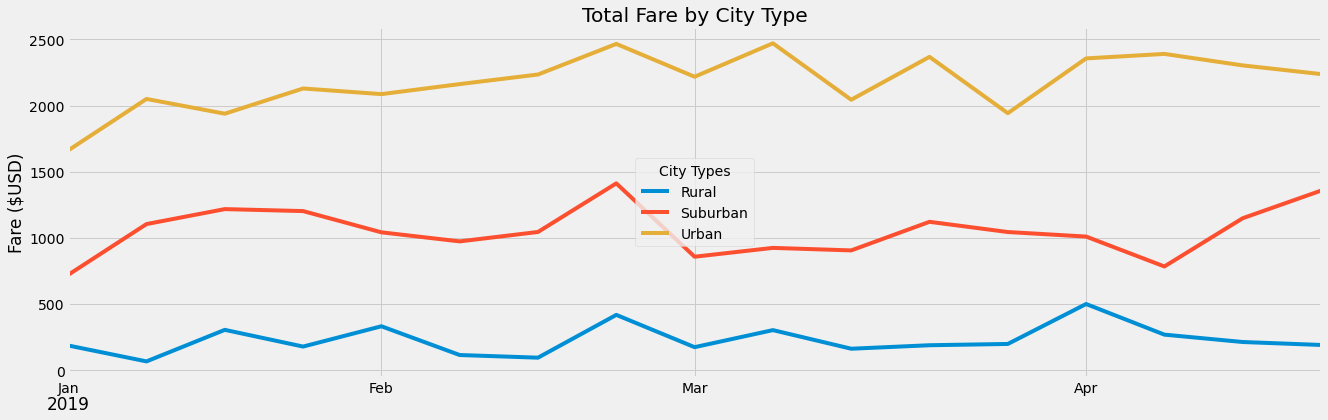

In [24]:
# Create a multi-line figure with 'fivethirtyeight' style to display sum of Fares by Type of City over time
# -----------------------------------------------------------------------------------------------------------

# Import dependencies
import matplotlib.dates as mdates

# Set 'fivethirtyeight' style for the plot
plt.style.use('fivethirtyeight')

# Create multi-line chart and add data
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(binnedDataDF.index, binnedDataDF["Rural"], label="Rural")
ax.plot(binnedDataDF.index, binnedDataDF["Suburban"], label="Suburban")
ax.plot(binnedDataDF.index, binnedDataDF["Urban"], label="Urban")

# Set title and axes labels
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("2019")
ax.xaxis.set_label_coords(0,-0.05)

# Customize x-axis
ax.set_xlim(binnedDataDF.index.min(),binnedDataDF.index.max())
majorXTicks = firstDateEachMonth(binnedDataDF.index.tolist())
ax.set_xticks(majorXTicks)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

# Customize legend 
plt.legend(loc="center", title="City Types")

# Save Figure
plt.savefig("analysis/Fig8_challenge.png")

# Display plot
plt.show()
